In [2]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots that will be created


# Read in the data

df = pd.read_csv(r'C:\Users\Piotr\Downloads\movies.csv\movies.csv')


In [3]:
# Let's look at the data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Let's see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
# Removing all rows which have at least one missing value

df = df.dropna()

In [5]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [6]:
# Data types for our columns

df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# Changing the data type of the columns

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df['votes'] = df['votes'].astype('int64')

df['runtime'] = df['runtime'].astype('int64')

In [8]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100


In [9]:
df['year_correct'] = df['released'].astype(str).str.partition(',')[2].str[:5]

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,2020


In [10]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [11]:
#pd.set_option('display.max_rows', None)

In [ ]:
# Drop any duplicates

#df.drop_duplicates()

In [12]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85,1982


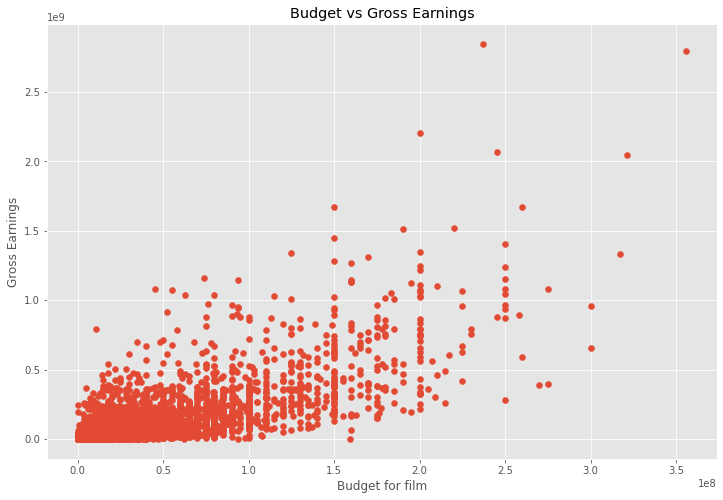

In [13]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for film')
plt.ylabel('Gross Earnings')
plt.show()



In [14]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


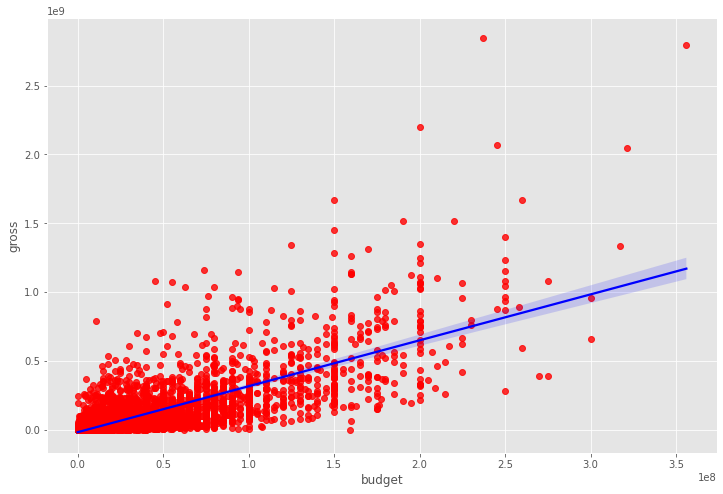

In [15]:
# Plot the budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color" : "blue"})

plt.show()

In [16]:
# Let's start looking at correlation

df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [ ]:
# High correlaction between budget and gross

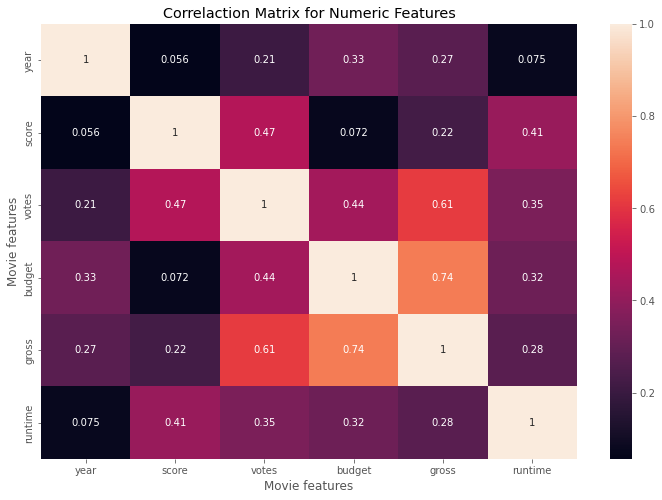

In [17]:
correlaction_matrix = df.corr(method='pearson')

sns.heatmap(correlaction_matrix, annot=True)
plt.title('Correlaction Matrix for Numeric Features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [18]:
# Looks at Company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [19]:
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,30
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,40
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,18
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,36
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,890,5.8,3500,585,2924,1498,47,3000000,5073,1385,96,36
2434,2969,5,0,1993,1467,4.5,1900,1805,3102,186,47,5000000,2970,1376,97,15
3681,1595,3,6,2000,1721,6.8,43000,952,1683,527,6,5000000,2554,466,108,22
272,2909,6,9,1982,1525,3.9,2300,261,55,1473,47,800000,2270,582,85,3


In [20]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85,1982


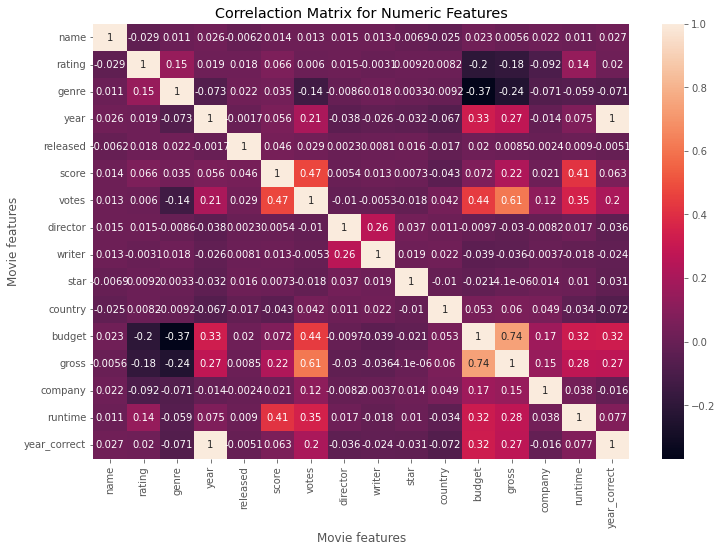

In [21]:
correlaction_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlaction_matrix, annot=True)

plt.title('Correlaction Matrix for Numeric Features')

plt.xlabel('Movie features')

plt.ylabel('Movie features')

plt.show()

In [22]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.026759
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.019560
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.070699
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.996723
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.005141
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.062648
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.204183
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.035738
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.023603
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.030840


In [23]:
correlaction_mat = df_numerized.corr()

corr_pairs = correlaction_mat.unstack()

corr_pairs

name          name            1.000000
              rating         -0.029234
              genre           0.010996
              year            0.025542
              released       -0.006152
              score           0.014450
              votes           0.012615
              director        0.015246
              writer          0.012880
              star           -0.006882
              country        -0.025490
              budget          0.023392
              gross           0.005639
              company         0.021697
              runtime         0.010850
              year_correct    0.026759
rating        name           -0.029234
              rating          1.000000
              genre           0.147796
              year            0.019499
              released        0.018083
              score           0.065983
              votes           0.006031
              director        0.014656
              writer         -0.003149
              star       

In [24]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre         budget         -0.368523
budget        genre          -0.368523
gross         genre          -0.244101
genre         gross          -0.244101
rating        budget         -0.203946
budget        rating         -0.203946
rating        gross          -0.181906
gross         rating         -0.181906
votes         genre          -0.135990
genre         votes          -0.135990
company       rating         -0.092357
rating        company        -0.092357
year          genre          -0.073167
genre         year           -0.073167
country       year_correct   -0.072407
year_correct  country        -0.072407
company       genre          -0.071334
genre         company        -0.071334
year_correct  genre          -0.070699
genre         year_correct   -0.070699
year          country        -0.066748
country       year           -0.066748
runtime       genre          -0.059237
genre         runtime        -0.059237
score         country        -0.043051
country       score      

In [25]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes         gross           0.614751
gross         votes           0.614751
              budget          0.740247
budget        gross           0.740247
year_correct  year            0.996723
year          year_correct    0.996723
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

# Votes and budget have the highest correlation to gross earnings

In [55]:
# Let's check which companies have the highest gross earnings

df_comp = df.groupby('company').sum()
df_comp

,year,score,votes,budget,gross,runtime
company,,,,,,
"""DIA"" Productions GmbH & Co. KG",2003,6.10,46000.00,36000000.00,44350926.00,109.00
"""Weathering With You"" Film Partners",2019,7.50,28000.00,11100000.00,193457467.00,112.00
.406 Production,1996,6.80,5300.00,250000.00,10580.00,96.00
1+2 Seisaku Iinkai,2000,8.20,22000.00,0.00,1196218.00,173.00
10 West Studios,2010,6.40,2600.00,0.00,814906.00,111.00
...,...,...,...,...,...,...
i am OTHER,2015,7.20,82000.00,7000000.00,17986781.00,103.00
i5 Films,2001,6.60,11000.00,3000000.00,10031529.00,101.00
iDeal Partners Film Fund,2013,7.50,5300.00,0.00,506303.00,108.00


In [58]:
df_comp = df_comp.sort_values(by=['gross'], inplace=False, ascending=False)
df_comp

,year,score,votes,budget,gross,runtime
company,,,,,,
Warner Bros.,668240,2149.20,64133043.00,19568300000.00,56491421806.00,38081.00
Universal Pictures,753986,2410.90,51082093.00,15989730001.00,52514188890.00,41406.00
Columbia Pictures,664096,2100.10,41116704.00,15512107000.00,43008941346.00,36519.00
Paramount Pictures,639424,2027.50,42389829.00,13723450000.00,40493607415.00,34299.00
Twentieth Century Fox,480111,1499.90,36701007.00,11474600000.00,40257053857.00,25935.00
...,...,...,...,...,...,...
The Jerry Gross Organization,1980,4.60,3900.00,300000.00,0.00,82.00
Abominable Pictures,2020,7.10,14.00,0.00,0.00,90.00
The Mount Company (II),1985,5.30,128.00,0.00,0.00,83.00


In [66]:
df_comp = df_comp[['budget', 'gross']]

In [59]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [67]:
df_comp

,budget,gross
company,,
Warner Bros.,19568300000,56491421806
Universal Pictures,15989730001,52514188890
Columbia Pictures,15512107000,43008941346
Paramount Pictures,13723450000,40493607415
Twentieth Century Fox,11474600000,40257053857
...,...,...
The Jerry Gross Organization,300000,0
Abominable Pictures,0,0
The Mount Company (II),0,0


In [69]:
df_comp20 = df_comp[:20]

In [70]:
df_comp20

,budget,gross
company,,
Warner Bros.,19568300000,56491421806
Universal Pictures,15989730001,52514188890
Columbia Pictures,15512107000,43008941346
Paramount Pictures,13723450000,40493607415
Twentieth Century Fox,11474600000,40257053857
Walt Disney Pictures,10404700000,36327887792
New Line Cinema,5648200000,19883797684
Marvel Studios,2664000000,15065592411
DreamWorks Animation,3344000000,11873612858


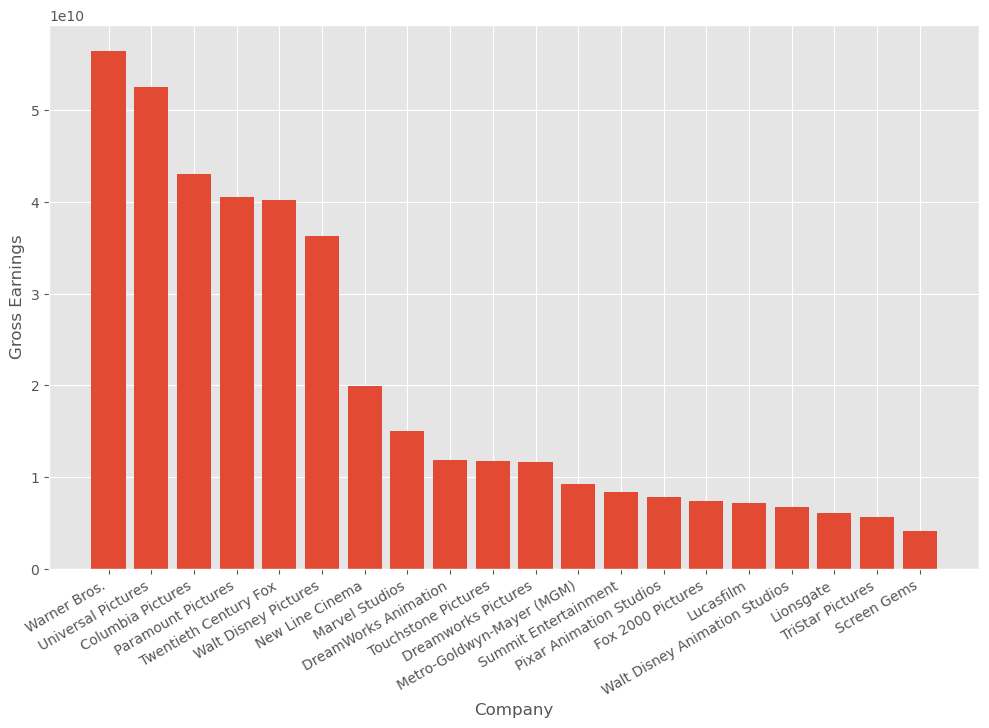

In [93]:
plt.bar(x=df_comp20.index, height=df_comp20['gross'])
plt.xlabel('Company')
plt.ylabel('Gross Earnings')
plt.gcf().autofmt_xdate()
plt.show()